## Imports and config

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import config as cfg
import models

## Load train data

In [4]:
X_train = pd.read_csv(cfg.FILENAMES["X_TRAIN"],)
print(len(X_train))
X_train.head()

2935849


,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,sales
0,0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.00
1,1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",899.00
2,2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",-899.00
3,3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1709.05
4,4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",1099.00


In [9]:
X_train_total = X_train.loc[X_train["item_cnt_day"]>=0,]
X_train_total = (X_train.groupby("date_block_num")
                .agg({"date":"min", "item_cnt_day":"sum", "sales":"sum"})
                .reset_index())
X_train_total.head(2)

,date_block_num,date,item_cnt_day,sales
0,0,01.01.2013,131479.0,91947091.13
1,1,01.02.2013,128090.0,90665707.37


/Users/robinblanchard/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


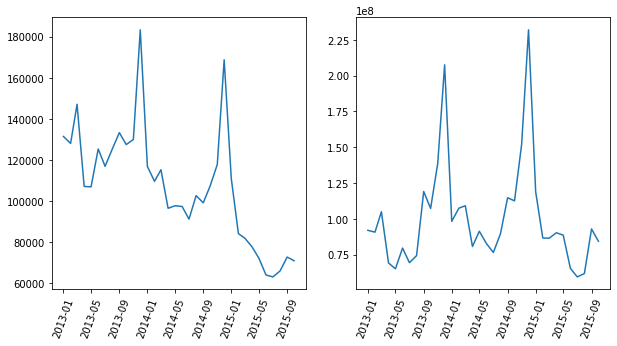

In [10]:
X_train_total["date"] = pd.to_datetime(X_train_total["date"], format="%d.%m.%Y")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(X_train_total["date"], X_train_total["item_cnt_day"])
plt.xticks(rotation=70)
plt.subplot(1,2,2)
plt.plot(X_train_total["date"], X_train_total["sales"])
plt.xticks(rotation=70)
plt.show()

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/